# Exercise Employee retention analysis
employee retention (i.e. whether they leave the company or continue to work)

refer HR_comma_sep.csv

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention 
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
import os 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
os.chdir("E:\PythonImaricusData\DAY7")
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# DATA EXPLORATION AND VISUALIZATION

In [3]:
left=df[df.left==1]
left.shape

(3571, 10)

In [4]:
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [6]:
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [8]:
## Average number for all columns

In [5]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

In [ ]:
#IMPQACT OF SALARY ON EMPLOYEE RETENTION

<AxesSubplot:xlabel='salary'>

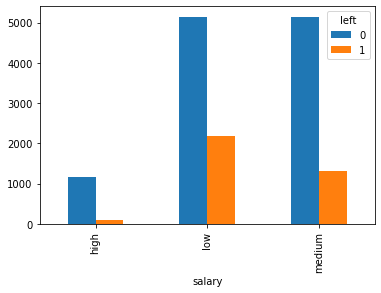

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [ ]:
#Above bar chart shows employees with high salaries are less likely to not leave the company and those having low and medium have high chaces to leave company

<AxesSubplot:xlabel='Department'>

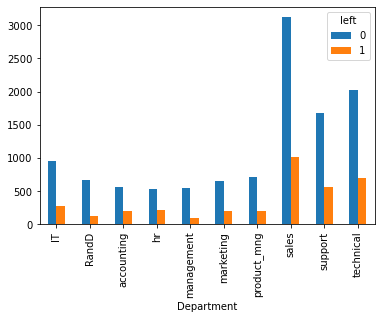

In [10]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [17]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [18]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [27]:
salary_dummies = pd.get_dummies(subdf.salary,prefix="salary")

In [28]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [29]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [31]:
#Remove salary column replaced by dummy variables so we can remove it safely

df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [32]:
x=df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [33]:
y=df.left

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [39]:
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#accuracy of the model

In [42]:
model.score(x_test,y_test)

0.78

In [43]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_test,y_pred)
cf_matrix

array([[3200,  201],
       [ 789,  310]], dtype=int64)

<AxesSubplot:>

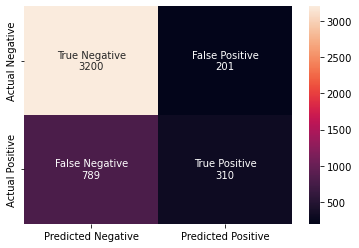

In [44]:
import numpy as np
import seaborn as sns
# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2,2)
axylabels = ['Actual Negative', 'Actual Positive']
axxlabels = ['Predicted Negative', 'Predicted Positive']

# plotting the heatmap
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)

In [45]:
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

acc = ((tp+tn)/(tp+fn+tn+fp))*100 # accuracy
tpr = (tp/(tp+fn))*100 # true positive rate
tnr = (tn/(tn+fp))*100 # true negative rate

print(str.format('Accuracy: {:.2f}%', acc))
print(str.format('True Positive Rate: {:.2f}%', tpr))
print(str.format('True Negative Rate: {:.2f}%', tnr))

Accuracy: 78.00%
True Positive Rate: 28.21%
True Negative Rate: 94.09%


In [ ]:
#ROC CURVE

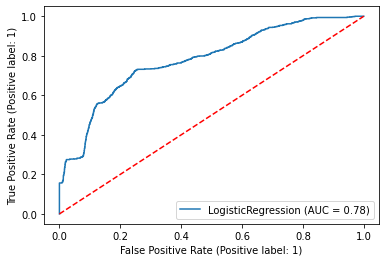

In [47]:
#plotting the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test,y_test)
plt.plot([0,1],[0,1],'r--')

In [ ]:
#To study p Value

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)

In [52]:
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459596
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10493
Method:                           MLE   Df Model:                            5
Date:                Sat, 03 Sep 2022   Pseudo R-squ.:                  0.1579
Time:                        16:58:17   Log-Likelihood:                -4825.3
converged:                       True   LL-Null:                       -5730.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.6690      0.106    -34.740      0.000      -3.876      -3.